Load modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Read in LHC matrix (inputdata)

In [4]:
inputdata = np.load(file="lhc_100.npy", allow_pickle=True)
inputdata.shape

(100, 6)

In [8]:
in_vars = ['medlynslope','dleaf','kmax','fff','dint','baseflow_scalar']

Visualize

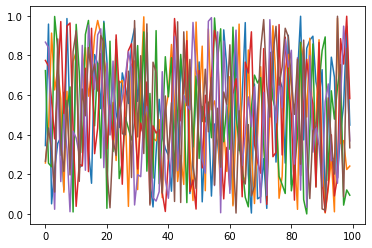

In [6]:
# each line is a parameter
plt.plot(inputdata);

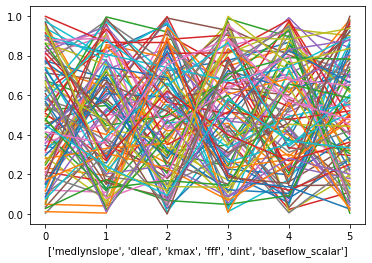

In [9]:
# each line is an ensemble member
plt.plot(np.transpose(inputdata))
plt.xlabel(in_vars);

Read in posterior distributions

In [11]:
posterior = np.load("MCMC_posteriors/MCMC_last_sample_1e4epochs_v7.npy")
posterior.shape

(200, 6)

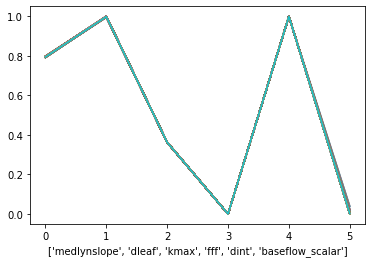

In [12]:
# each line is a solution of parameter values
plt.plot(np.transpose(posterior))
plt.xlabel(in_vars);

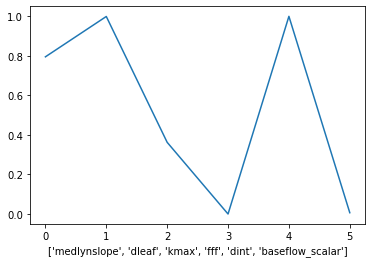

In [16]:
# average posterior position
plt.plot(np.mean(np.transpose(posterior), axis=1))
plt.xlabel(in_vars);

Superimpose PPE and posterior

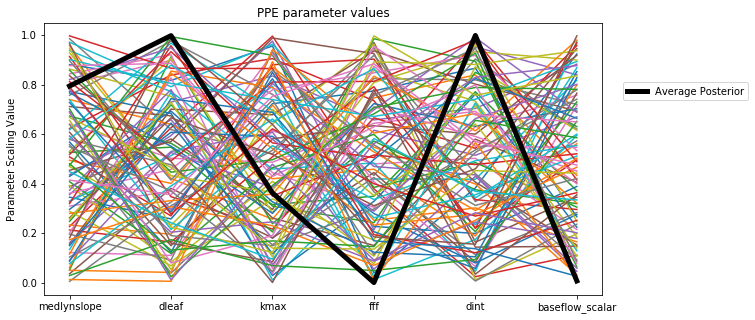

In [58]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.transpose(inputdata))
#plt.plot(np.mean(np.transpose(inputdata), axis=1), linewidth=3, c='b', label="Average PPE")
plt.plot(np.mean(np.transpose(posterior), axis=1), linewidth=5, c='k', label="Average Posterior")
#plt.xlabel(in_vars);
plt.ylabel("Parameter Scaling Value")
plt.title("PPE parameter values")
#plt.legend(loc='upper center')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
plt.xticks(np.arange(6), labels=in_vars);
#fig.savefig("inputdata_LHC_posterior.pdf", bbox_inches='tight')